In [ ]:
#OK

In [1]:
using Plots
using DifferentialEquations
using JuliaMBD
using JuliaMBD.Diagram

In [2]:
@model tr_r_pnt begin
    @parameter begin
        d_Rr_wheel=3162.3
        k_Rr_wheel=200000
        z_k_Rr_wheel_ini=0.016621
    end
    @xmlmodel("METI_Vertical_Vibration.drawio", "TR_R_PNT") 
end

tr_r_pnt (generic function with 1 method)

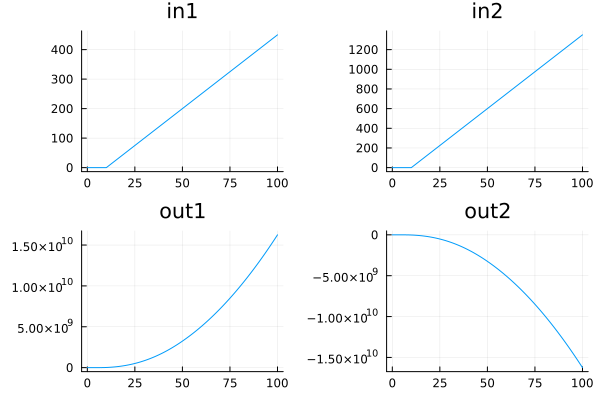

In [4]:
@model TestTr_r_pnt begin


    @block begin
        p = tr_r_pnt()
        ramp1 = Ramp(starttime=10, slope=5)
        ramp2 = Ramp(starttime=10, slope=15)
    end
    @connect begin
        ramp1.out => p.v_MUS_R2TR_R_mps
        ramp2.out => p.v_RD2TR_R_mps
    end
    @scope begin
        p.v_MUS_R2TR_R_mps => in1
        p.v_RD2TR_R_mps => in2
        p.F_TR_R2MUS_R_N => out1
        p.F_TR_R2RD_N => out2
    end
end
m = @compile TestTr_r_pnt()
res = simulate(m, tspan=[0, 100])
plot(res, layout=(2,2))